In [ ]:
import pandas as pd

# Load processed dataset
df = pd.read_csv("../Diamonds-Price-Prediction/Data/diamonds_processed.csv")

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.preprocessing import StandardScaler

num_cols = ['carat', 'depth', 'table', 'volume']  # numeric columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=6,random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}


In [33]:
import numpy as np
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # compute RMSE manually
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE" : mse,
        "RMSE": rmse,
        "R2_Score": r2
    })

results_df = pd.DataFrame(results).sort_values(by="R2_Score", ascending=False)
print(results_df)


c:\Users\Anwar\Desktop\machine_learning\Diomend\diamond\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.068e+09, tolerance: 2.499e+07
  model = cd_fast.enet_coordinate_descent(


               Model            MSE        RMSE  R2_Score
6            XGBoost  134544.187500  366.802655  0.980272
4      Random Forest  139550.757377  373.564931  0.979537
3      Decision Tree  232311.169679  481.986690  0.965936
5  Gradient Boosting  305716.417029  552.916284  0.955172
7                SVR  336387.855839  579.989531  0.950675
0  Linear Regression  513955.377862  716.906813  0.924638
1   Ridge Regression  514273.702109  717.128790  0.924591
2   Lasso Regression  514830.097745  717.516618  0.924509


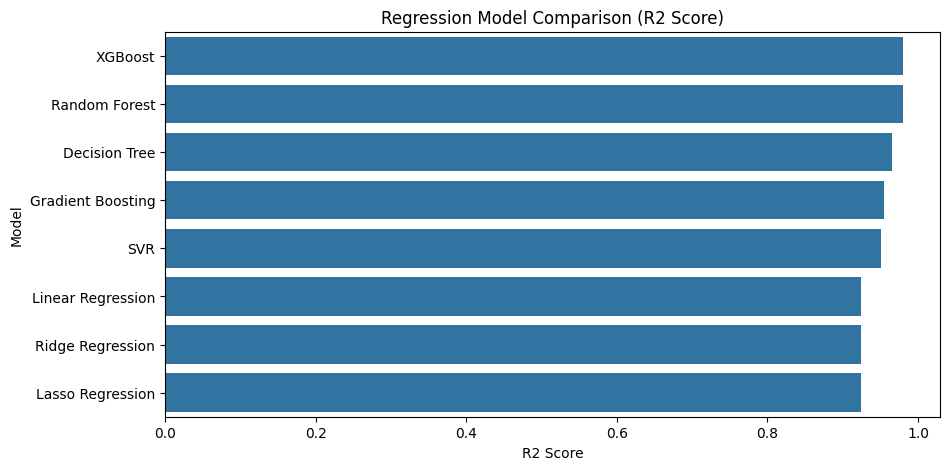

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='R2_Score', y='Model', data=results_df)
plt.title("Regression Model Comparison (R2 Score)")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()

In [35]:
import joblib

In [36]:
# Best model name (highest R2)
best_model_name = results_df.iloc[0]['Model']
print("Best Model:", best_model_name)

# Retrieve the actual model object from the dictionary
best_model = models[best_model_name]


Best Model: XGBoost


In [ ]:
# Save the model
joblib.dump(best_model, "../Diamonds-Price-Prediction/models/best_diamond_model.pkl")
print(f"{best_model_name} saved as 'best_diamond_model.pkl'")


XGBoost saved as 'best_diamond_model.pkl'


In [ ]:
#Load the model later for predictions
loaded_model = joblib.load("best_diamond_model.pkl")

# Predict new data
new_predictions = loaded_model.predict(X_test)